## Metropolis Hastings Algorithm Summary 

This is a two step porcess whcih ends up defnfing a trasnition distribution from the current state to the proposal state, ie. the state which the proposed target paramter from the the proposal distribution is accepted according the acceptance probablity. 

Where the target paramter is: $ x^{(t)}$

Now how does this work? and how is the acceptance probbality determined?

The process happens through accepting draws of $\tilde x^{(t)}$ from a proposal distribution $q(\tilde x^{(t)}|x^{(t-1)})$

The state next state will change to this porposed state drawn from the proposal distribution if the porposed state is past a certain acceptance probabality. This accpetance porbbaality is derived by this formula: 
$$
\min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right)
$$


so the current acacpeted state we get is given by: 
$$
x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.
$$

Which will produce draws from the pdf 
$$
p(x^{(t)})
$$

which is the target distribution

Now for the two step conditional process to obtain the transition didstribution: 
$$
p(\tilde x^{(t)}|x^{(t-1)})
$$ 

We need to find:
$$
\Pr(\textrm{accept}|\textrm{proposal},\textrm{current state}) q(\textrm{proposal}|\textrm{current state})
$$

which is the probaablity we accpet the propossal given the porsla and current state we have times the pdf of the proposed values given the current state. Since we are in the current state we just need to find: $$ 
\Pr(\textrm{accept}|\textrm{proposal}) p(\textrm{proposal}|\textrm{current state})
$$

which is equal to:
$$
\Pr(x^{(t)} = \tilde x^{(t)}) q(\tilde x^{(t)}|x^{(t-1)}) = p(\tilde x^{(t)}|x^{(t-1)})
$$ 

and there you have it we hav ethe transition distriubtion through the two step conditionla porcess. 

Step 1: Draw from the proposal distirbution. 
Step 2: Accept or decline the propsal. 

at the end we take the updated proposal dsitirbvutoin given all hte data and find the trnasiiton distribution. 

## Implementing Metropolis Hastings 

Trial where we see how close the MH algo can get to estimating the tragte distribution the standard normal distirbution given the proposal disitrbution is normal with the mean being the last obervation and std sigma and the : 

$$
\begin{align*}
p(x^{(t)}) & \rightarrow {} N(0,1)\\
q(\tilde x^{(t)}|x^{(t-1)}) & \rightarrow {} N(x^{(t-1)},\sigma)
\end{align*}
$$


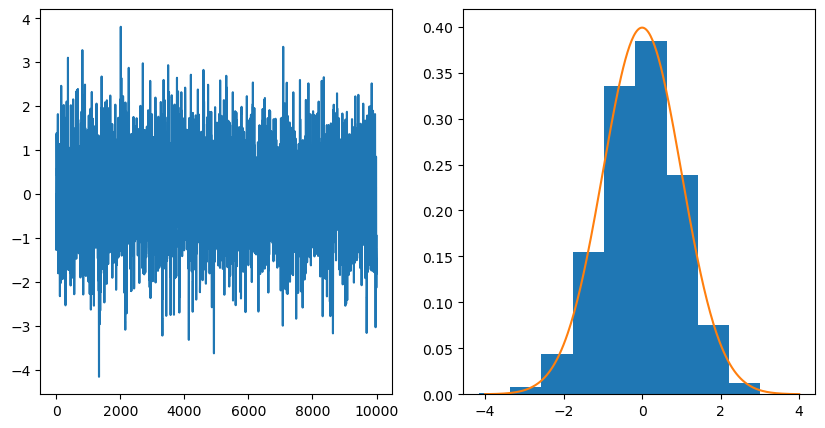

In [1]:
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 

# First make the sampling pdfs 
p_x_pdf = lambda x: stats.norm().pdf(x)
mh_tuning_parameter = 1.5
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=mh_tuning_parameter)
proposal_distribution = q_xt_given_xtm1

# next run the MH for 1000 tries 
m = 10000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    # sample an x_tilde from the proposal dist
    x_tilde = proposal_distribution(x[t-1]).rvs()
    #dtermine the accpetance porbbality based on the MH
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    #if the accpetance porbabality is higher that a random probabality accpetp
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde       
    # if not then keep x now as the previous x and add rejection 
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

## Solve HW Q3 from Bayes_03_Metropolis_Hastings

For **Metropolis Hastings** targetting (**stationary distribution**) $p$ based on proposal distribuiton $q$ given below

$\begin{align}
q(\tilde x^{(t)} | x^{(t-1)}) &={} \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}} \quad \color{gray}{\textrm{ ... does } \quad \frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})} \quad  \textrm{ cancel?}}\\
\textrm{and} \quad p(x^{(t)}) &={} \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}\\
\end{align}$

<u>show that</u> the **transition kernel** $K$ of transition probabilities is defined the **Metropolis Hastings** algorithm is

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$

> For example 
>
> $\begin{align}
\Pr(s_1 \rightarrow s_1) &={}
q(\tilde x^{(t)}=1 | x^{(t-1)}=1) + q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \left(1- \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)}\right)\\
&={} 1/2 + (1/2)(1-(1/3)/(2/3)) = 0.75
\end{align}$



This **transition kernel** $K$ means that

- if we're currently a $0$ there's a 50\% chance that we'll stay a $0$ and 50\% chance that we'll change to a $1$
- and if we're currently a $1$ there's a 75\% chance that we'll stay a $1$ and 25\% chance that we'll change to a $0$

which specifies [geometric distributions](https://en.wikipedia.org/wiki/Geometric_distribution) with, respectively, expected values of $1$ and $3$ "failures before transitioning to the other state" which means that on average a "$0$ state" will be a run of two $0$'s while a "$1$ state" will be a run of four $1$'s which leads to the desired one-to-two (or one-thirds to two-thirds) ratio of $0$'s and $1$ is the Markov Chain. 

So lets start with thinking about what this question is asking. 
It is asking to prove that the trasition kernel is equal to what it states it to be given the information above and what we know about MH.

First lets simplify the transition kernel. The change from t to t + 1 should be the same as t - 1 to t.

Now look to the transition dynamics. no omatter what the proposal draw is the porposal value is alwasy 1/2. Therefore the normallization ocnant cancels out and the accpetance probabality is just: 
$$
\min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\right)
$$

From here we can derive all values in the kernel. 

$\begin{align}
\Pr(s_1 \rightarrow s_1) &={}
\min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\right) q(\tilde x^{(t)}=1 | x^{(t-1)}=1) + q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \left(1- (\min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\right)\right)\\
&={} 1/2 + (1/2)(1-(1/3)/(2/3)) = 0.75
\end{align}$

simple formula = probabality accept * proposal to stay + proposal to change * porbablity denied 



## PyMC Summary 

PyMC is an open osurce probabalistic programming framework wittne in pythoin that uses pytensor to compute gradients via automatic diffirentiation as well as complilling probablistic programs on the fly to one of a suite of somputational backends for increase speed.

It features next-generation MArkov Chain MOnte Carlo MCHC smaplign algo ritms such as the no u turn smaplere and a self tuning variant of hamiltonian monte calro. This calss of samplers works well on high dimensinal cna complex posterior distriuutions and allows many complex models to be fit. HMC and NUTS take advantage of gradient information from the liklihood to ahcinve much faster convergence than traditional smapling methods esapeccialy for larger models. NUTS also has severla self tuning stratgeies fro adaptivley setting the tunable parametrs o hamiltoina montre carlo.

The way it is built is that within the pymc model: 
1. define the priors for unknonw model paramters 
2. then create the expected values outcomes 
3. then define the likelihood (sampling ditriubtion) of obervations

then draw and it runs! 

Now lets see an easy model built... 

In [3]:
# first make data generatign porcess 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

n = 100
true_theta, true_tau = 0,1
data_generating_mechanism = \
stats.norm(loc=true_theta, scale=true_tau**(-0.5))
x = data_generating_mechanism.rvs(size=n)

In [4]:
# Build a connjagate normal gamma model. 

# normal-gamma distribution is a bivariate four-parameter family of 
# continuous probability distributions. 
# It is the conjugate prior of a normal distribution with unknown mean and precision

import pymc 

# Create the model 

conjugate_normal_gamma = pymc.Model()

# open the pymc model, this is called creating a context manager 

with conjugate_normal_gamma: 
    
    # defining true parameter values guess 
    theta0 = 0  # prior belief regarding true_theta
    theta_prior_n = 1  # strength of prior belief as units of data
    # theta_prior_n = tau0/true_tau
    tau0 = theta_prior_n*true_tau
    tau_SS_prior = 1  # prior belief regarding true_sum_of_squares
    tau_prior_n = 1  # strength of prior belief as units of data
    
    # now define the prior distributions 
    theta = pymc.Normal("theta", mu=theta0, sigma=tau0**(-0.5))
    tau = pymc.Gamma("tau", alpha=tau_prior_n/2, 
                            beta=tau_SS_prior/2)
    
    # now define the Likelihood (sampling distribution) of observations
    x_obs = pymc.Normal("x_obs", mu=theta, tau=tau, observed=x)

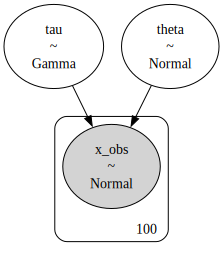

In [5]:
# see the dag grapgh 
pymc.model_to_graphviz(conjugate_normal_gamma)

In [6]:
# now see the sample data and draw samples 
m = 10000
with conjugate_normal_gamma:
    # draw m posterior samples
    idata = pymc.sample(draws=m, chains=2, tune=100)
    # arviz.InferenceData object

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 100 tune and 10_000 draw iterations (200 + 20_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


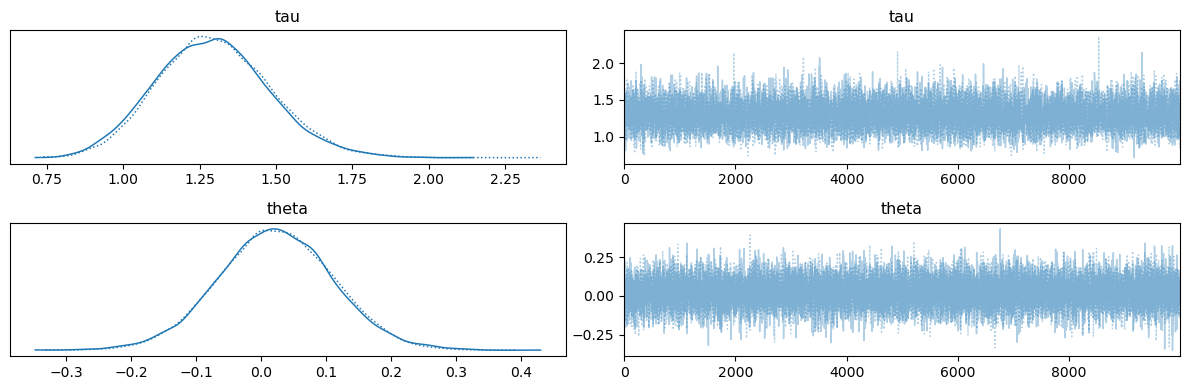

In [8]:
# now plot the trace plots to see the posteriors of the parameters 
import arviz as az

az.plot_trace(idata)
plt.tight_layout()

## Solve HW Q2 from Bayes_04_PyMC_Universal_Samplers 

1. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a normal distribution and your prior for $\tau$ is a gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

2. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a non normal distribution and your prior for $\tau$ is a non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

3. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a yet another different again non normal distribution and your prior for $\tau$ is a yet another different again non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*


To start which diagnostics are available for pymc models: 
1. mean: of the paramter prosterios 
2. std: of the paramter prosterios 
3. high densiity interval atthe 95% CL: of the paramter prosterios  
4. monte carlo standard erroe mean and std: it signifies the estimated error associated with the mean and standard deviation calculated from a Monte Carlo simulation, essentially indicating how much variability exists in the estimated values due to the sampling process; a lower MCSE value means a more precise estimate with less noise from the simulation
5. Effective smaple size for the bulk of data (HDI) 
6. Efffective smaple size for the tails of data (outside HDI) 
7. r-hat: a statistical diagnostic used to assess whether multiple Markov Chain Monte Carlo (MCMC) chains have converged to the same posterior distribution in a Bayesian model; essentially, it checks if different chains are exploring the same area of the parameter space, and a value close to 1 indicates good convergence, while a value significantly greater than 1 suggests poor mixing and potential issues with the model fit. PyMc interpetation is: Rhat diagnostic is basically a comparison of within and between chain variances. If all chains are sampling the same distribution (which is the case if the MCMC has converged), it will necessarily be close to 1 as within and between chain variances will be the same.

In [9]:
# For 1 this is the same model from above, i will provide diagnostics
# and interpet them now. 

# Sumamry statitics for conjugate_normal_gamma model
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau,1.29537,0.18431,0.94948,1.63914,0.00180,0.00127,10404.72869,10748.39563,1.00037
theta,0.02200,0.08841,-0.14750,0.18632,0.00062,0.00061,20078.91877,14242.14460,0.99999


In [19]:
# For 2 where thate prior is non normal and tau prior is nongamma 

non_normgam = pymc.Model()

# open the pymc model, this is called creating a context manager 

with non_normgam: 
    
    # defining true parameter values guess 
    theta0 = 0  # prior belief regarding true_theta
    theta_prior_n = 1  # strength of prior belief as units of data
    # theta_prior_n = tau0/true_tau
    tau0 = theta_prior_n*true_tau
    tau_SS_prior = 1  # prior belief regarding true_sum_of_squares
    tau_prior_n = 1  # strength of prior belief as units of data
    
    # now define the prior distributions 
    theta = pymc.HalfNormal("theta1", sigma=tau0**(-0.5))
    tau = pymc.Beta("tau1", alpha=tau_prior_n/2, 
                            beta=tau_SS_prior/2)
    
    # now define the Likelihood (sampling distribution) of observations
    x_obs0 = pymc.Normal("x_obs0", mu=theta, tau=tau, observed=x)

In [21]:
# now see the sample data and draw samples 
m = 10000
with non_normgam:
    # draw m posterior samples
    idata = pymc.sample(draws=m, chains=4, tune=100)
    # arviz.InferenceData object

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta1, tau1]


Sampling 4 chains for 100 tune and 10_000 draw iterations (400 + 40_000 draws total) took 12 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


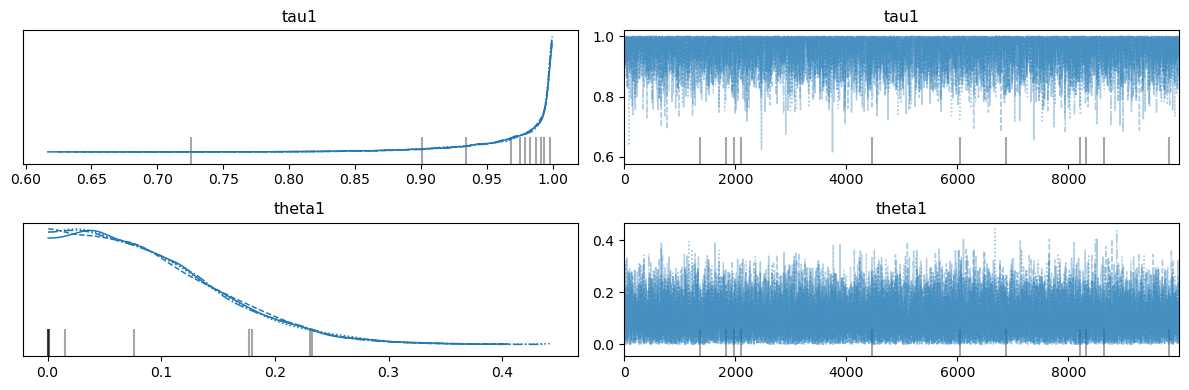

In [22]:
# now plot the trace plots to see the posteriors of the parameters 
import arviz as az

az.plot_trace(idata)
plt.tight_layout()

In [23]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau1,0.96720,0.0406,0.89022,1.00000,0.00036,0.00026,6901.02936,6218.32145,1.00014
theta1,0.09084,0.0658,0.00002,0.20756,0.00047,0.00033,14634.23085,10652.91915,1.00012


In [27]:
non_normgam2 = pymc.Model()

# open the pymc model, this is called creating a context manager 

with non_normgam2: 
    
    # defining true parameter values guess 
    theta0 = 0  # prior belief regarding true_theta
    theta_prior_n = 1  # strength of prior belief as units of data
    # theta_prior_n = tau0/true_tau
    tau0 = theta_prior_n*true_tau
    tau_SS_prior = 1  # prior belief regarding true_sum_of_squares
    tau_prior_n = 1  # strength of prior belief as units of data
    
    # now define the prior distributions 
    theta = pymc.Gamma("theta2", mu=1, sigma=tau0**(-0.5))
    tau = pymc.InverseGamma("tau2", alpha=tau_prior_n/2, 
                            beta=tau_SS_prior/2)
    
    # now define the Likelihood (sampling distribution) of observations
    x_obs0 = pymc.Normal("x_obs0", mu=theta, tau=tau, observed=x)

In [28]:
# now see the sample data and draw samples 
m = 10000
with non_normgam2:
    # draw m posterior samples
    idata = pymc.sample(draws=m, chains=4, tune=100)
    # arviz.InferenceData object

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta2, tau2]


Sampling 4 chains for 100 tune and 10_000 draw iterations (400 + 40_000 draws total) took 13 seconds.


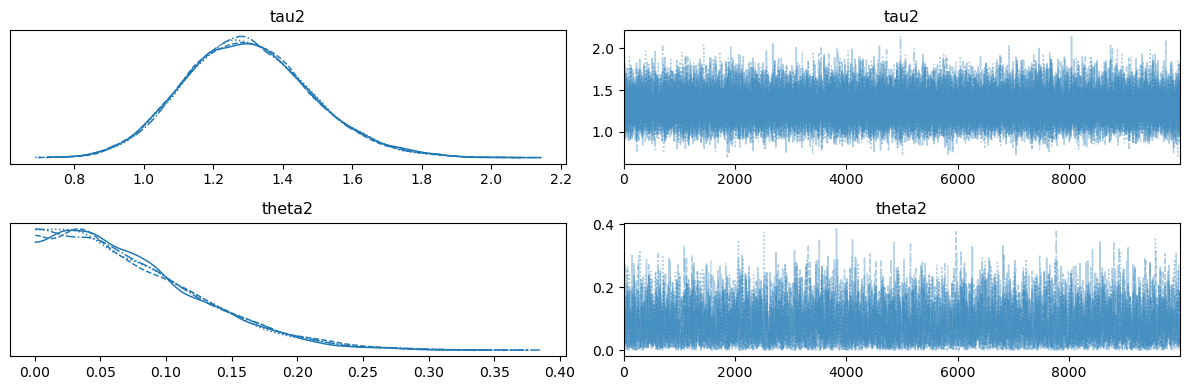

In [29]:
# now plot the trace plots to see the posteriors of the parameters 
import arviz as az

az.plot_trace(idata)
plt.tight_layout()

In [30]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau2,1.29967,0.18295,0.96677,1.65261,0.00089,0.00063,41637.39448,29164.21979,1.00018
theta2,0.07599,0.05640,0.00002,0.17642,0.00071,0.00050,5321.55421,5440.55842,1.00031
